# Activity vs Calories

In [1]:
# importing
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data
daily_activity = pd.read_csv("dailyActivity_merged.csv") 
hourly_calories= pd.read_csv("hourlyCalories_merged.csv")
hourly_steps = pd.read_csv("hourlySteps_merged.csv")

## Understanding the data

### i) daily_activity

In [2]:
daily_activity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [3]:
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [4]:
daily_activity.shape

(940, 15)

In [5]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


### ii) hourly_calories

In [6]:
hourly_calories.describe()


,Id,Calories
count,2.209900e+04,22099.000000
mean,4.848235e+09,97.386760
std,2.422500e+09,60.702622
min,1.503960e+09,42.000000
25%,2.320127e+09,63.000000
50%,4.445115e+09,83.000000
75%,6.962181e+09,108.000000
max,8.877689e+09,948.000000


In [7]:
hourly_calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   Calories      22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


In [8]:
hourly_calories.shape

(22099, 3)

In [9]:
hourly_calories.head()

,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


### iii) Hourly_steps

In [10]:
hourly_steps.describe()

,Id,StepTotal
count,2.209900e+04,22099.000000
mean,4.848235e+09,320.166342
std,2.422500e+09,690.384228
min,1.503960e+09,0.000000
25%,2.320127e+09,0.000000
50%,4.445115e+09,40.000000
75%,6.962181e+09,357.000000
max,8.877689e+09,10554.000000


In [11]:
hourly_steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   StepTotal     22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


In [12]:
hourly_steps.shape

(22099, 3)

In [13]:
hourly_steps.head()

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


## Number of Unique Users

In [14]:
daily_activity['Id'].nunique()

33

## Check Missing Values

In [15]:
print(daily_activity.isnull().sum())

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64


## Descriptive Statistics

In [16]:
daily_activity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [17]:
# no need to drop any other 0 rows since it is related by their titles and will not affect the analysis in a wrong way

# Graphics

## Different Active Distances

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

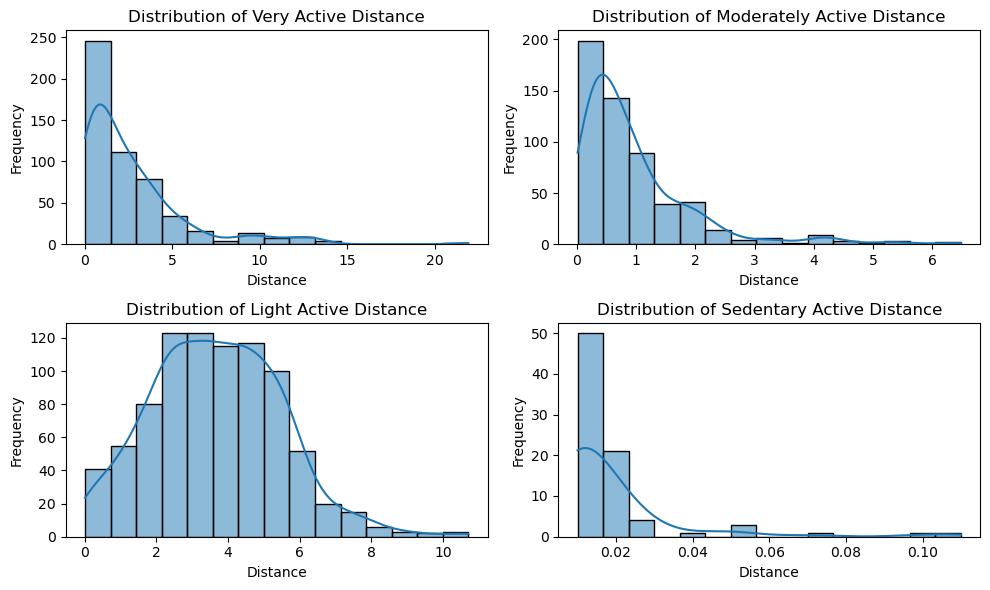

In [18]:
fig,axes = plt.subplots(2,2,figsize=(10,6))
sns.histplot(daily_activity[daily_activity["VeryActiveDistance"]>0]['VeryActiveDistance'], kde=True, bins=15,ax=axes[0,0])
axes[0,0].set_title('Distribution of Very Active Distance')
axes[0,0].set_xlabel('Distance')
axes[0,0].set_ylabel('Frequency')
sns.histplot(daily_activity[daily_activity["ModeratelyActiveDistance"]>0]['ModeratelyActiveDistance'], kde=True, bins=15,ax=axes[0,1])
axes[0,1].set_title('Distribution of Moderately Active Distance')
axes[0,1].set_xlabel('Distance')
axes[0,1].set_ylabel('Frequency')
sns.histplot(daily_activity[daily_activity["LightActiveDistance"]>0]['LightActiveDistance'], kde=True, bins=15,ax=axes[1,0])
axes[1,0].set_title('Distribution of Light Active Distance')
axes[1,0].set_xlabel('Distance')
axes[1,0].set_ylabel('Frequency')
sns.histplot(daily_activity[daily_activity["SedentaryActiveDistance"]>0]['SedentaryActiveDistance'], kde=True, bins=15,ax=axes[1,1])
axes[1,1].set_title('Distribution of Sedentary Active Distance')
axes[1,1].set_xlabel('Distance')
axes[1,1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()


## Different Active Minutes

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

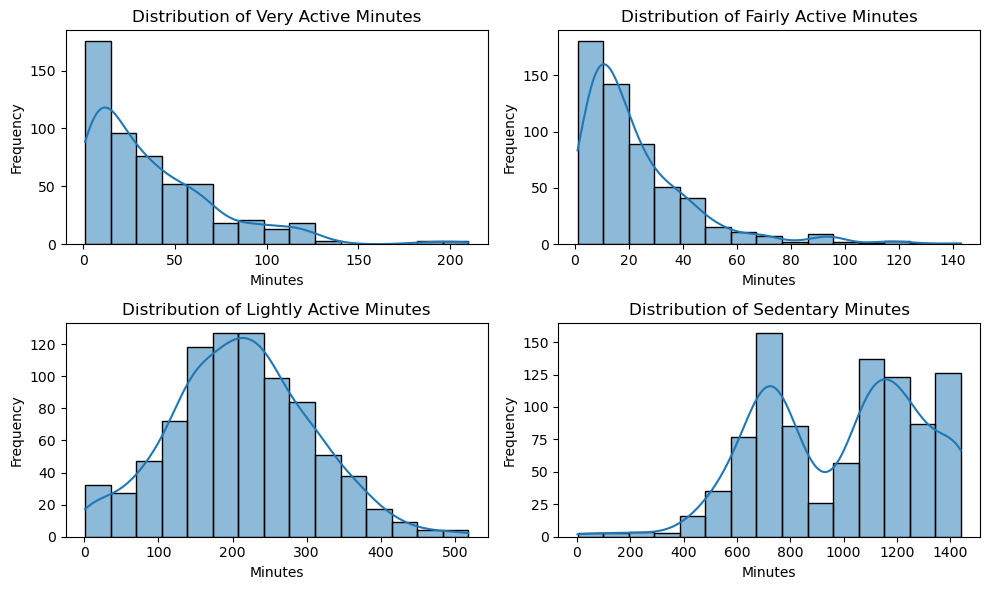

In [19]:
fig,axes = plt.subplots(2,2,figsize=(10,6))
sns.histplot(daily_activity[daily_activity["VeryActiveMinutes"]>0]['VeryActiveMinutes'], kde=True, bins=15,ax=axes[0,0])
axes[0,0].set_title('Distribution of Very Active Minutes')
axes[0,0].set_xlabel('Minutes')
axes[0,0].set_ylabel('Frequency')
sns.histplot(daily_activity[daily_activity["FairlyActiveMinutes"]>0]['FairlyActiveMinutes'], kde=True, bins=15,ax=axes[0,1])
axes[0,1].set_title('Distribution of Fairly Active Minutes')
axes[0,1].set_xlabel('Minutes')
axes[0,1].set_ylabel('Frequency')
sns.histplot(daily_activity[daily_activity["LightlyActiveMinutes"]>0]['LightlyActiveMinutes'], kde=True, bins=15,ax=axes[1,0])
axes[1,0].set_title('Distribution of Lightly Active Minutes')
axes[1,0].set_xlabel('Minutes')
axes[1,0].set_ylabel('Frequency')
sns.histplot(daily_activity[daily_activity["SedentaryMinutes"]>0]['SedentaryMinutes'], kde=True, bins=15,ax=axes[1,1])
axes[1,1].set_title('Distribution of Sedentary Minutes')
axes[1,1].set_xlabel('Minutes')
axes[1,1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

## Max Date

In [20]:
last_date = daily_activity['ActivityDate'].max()
last_date

'5/9/2016'

In [21]:
daily_activity = daily_activity[daily_activity['ActivityDate'] < last_date]


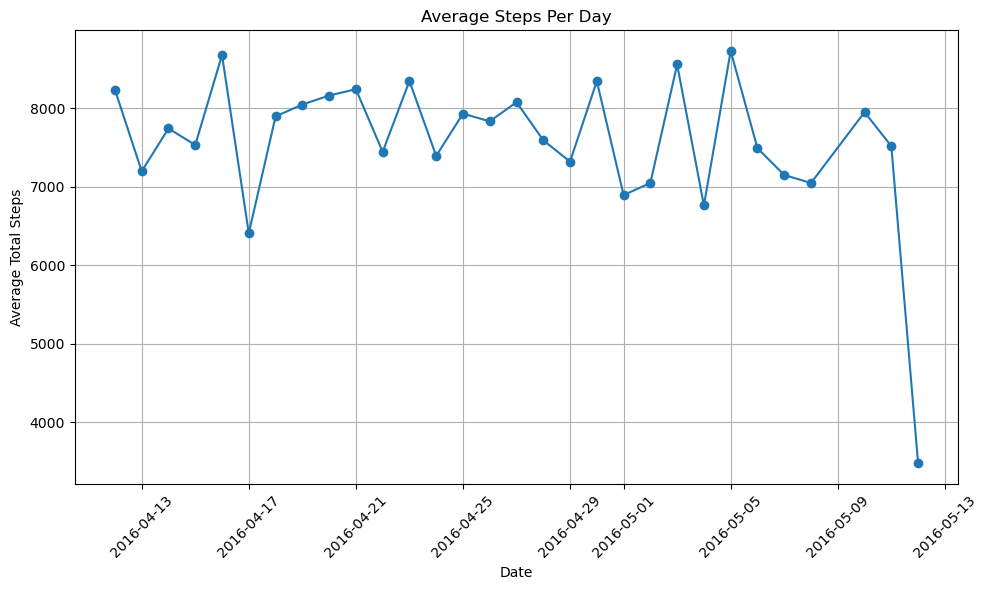

In [22]:
daily_activity['ActivityDate'] = pd.to_datetime(daily_activity['ActivityDate'], format='%m/%d/%Y')

average_steps_per_day = daily_activity.groupby('ActivityDate')['TotalSteps'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(average_steps_per_day['ActivityDate'], average_steps_per_day['TotalSteps'], marker='o', linestyle='-')
plt.title('Average Steps Per Day')
plt.xlabel('Date')
plt.ylabel('Average Total Steps')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

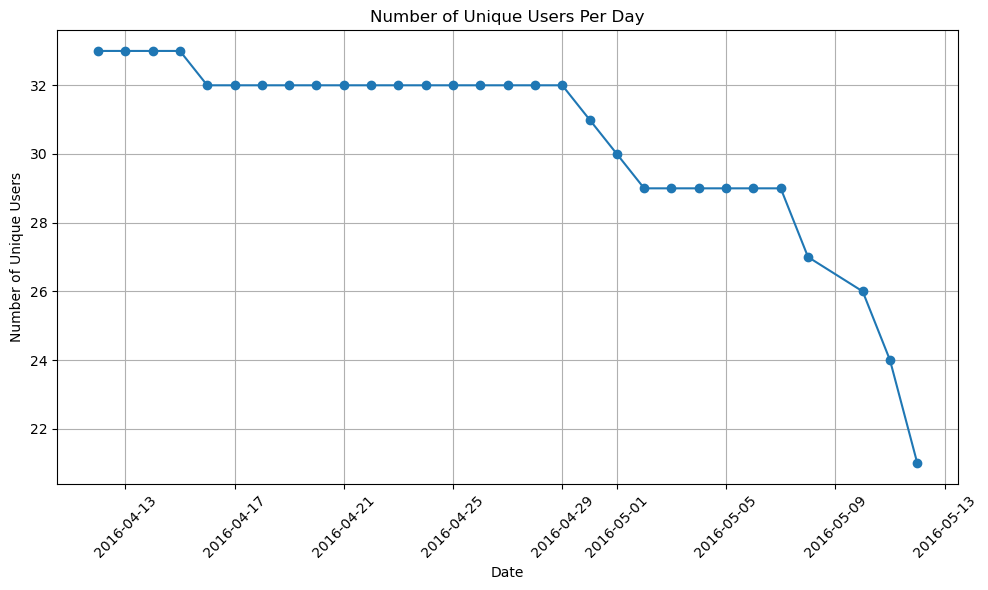

In [23]:
unique_ids_per_day = daily_activity.groupby('ActivityDate')['Id'].nunique().reset_index()
unique_ids_per_day.columns = ['ActivityDate', 'UniqueIDs']
 
plt.figure(figsize=(10, 6))
plt.plot(unique_ids_per_day['ActivityDate'], unique_ids_per_day['UniqueIDs'], marker='o', linestyle='-')
plt.title('Number of Unique Users Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Unique Users')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

the reason of the graphic above is to predict the preceding one's behavior e.g., if decrease is about the shortage of the users or same amount of users but they all walked less? --> the amount of people have little effect

## Calories

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


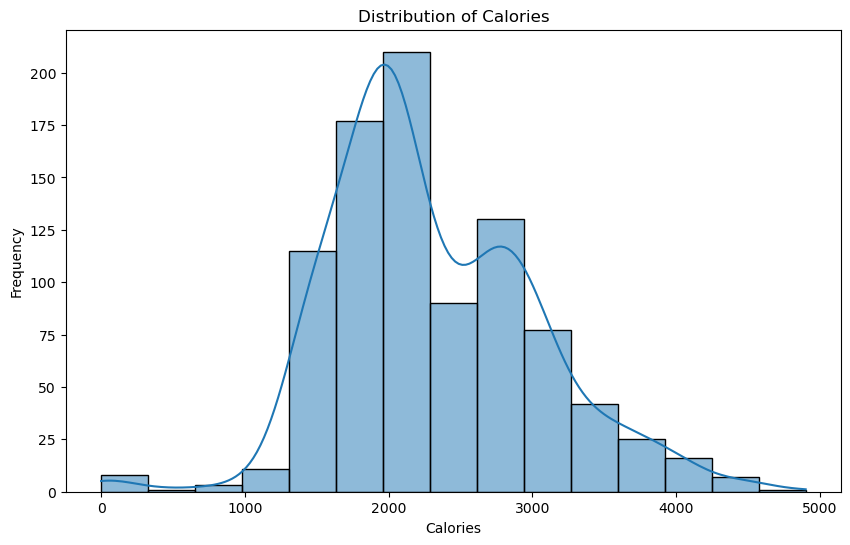

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(daily_activity['Calories'], kde=True, bins=15)
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

In [25]:
daily_activity["DayOfWeek"]= daily_activity["ActivityDate"].dt.day_name()
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


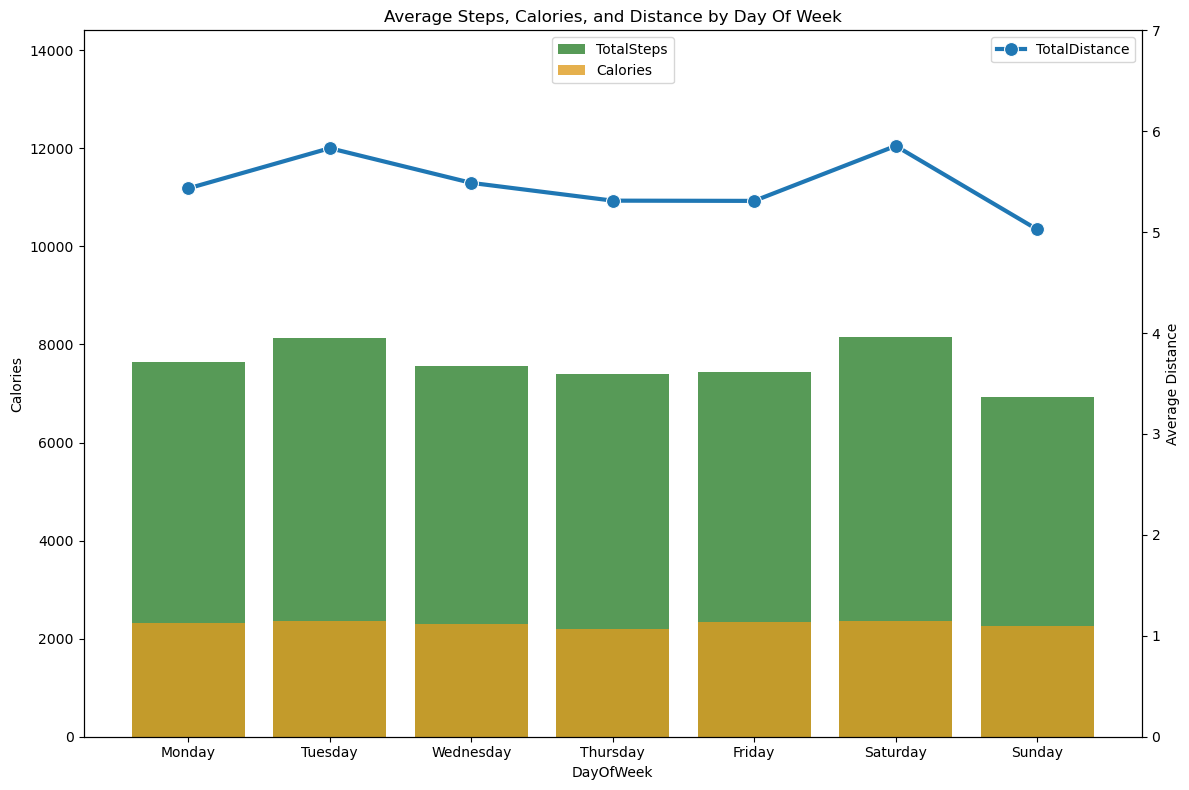

In [26]:
week_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_totalsteps = daily_activity.groupby('DayOfWeek')['TotalSteps'].mean().reindex(week_days)
average_calories = daily_activity.groupby('DayOfWeek')['Calories'].mean().reindex(week_days)
average_dailydistance = daily_activity.groupby('DayOfWeek')['TotalDistance'].mean().reindex(week_days)

plt.figure(figsize=(12, 8))
 
sns.barplot(x=average_totalsteps.index, y=average_totalsteps, color="green",  alpha=0.7, label='TotalSteps')
sns.barplot(x=average_calories.index, y=average_calories, color="orange", alpha=0.8, label='Calories')
plt.ylim(0, daily_activity[['TotalSteps', 'Calories']].max().max() * .40)
plt.legend(loc="upper center")
 
ax2 = plt.twinx()
sns.lineplot(x=average_dailydistance.index, y=average_dailydistance, marker='o', markersize=10, linewidth=3, ax=ax2, label='TotalDistance')
ax2.set_ylim(bottom=0)
ax2.set_ylim(top=7)
ax2.legend(loc='upper right')

plt.title('Average Steps, Calories, and Distance by Day Of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Distance')
plt.tight_layout()
plt.show()

### Hour vs Calories

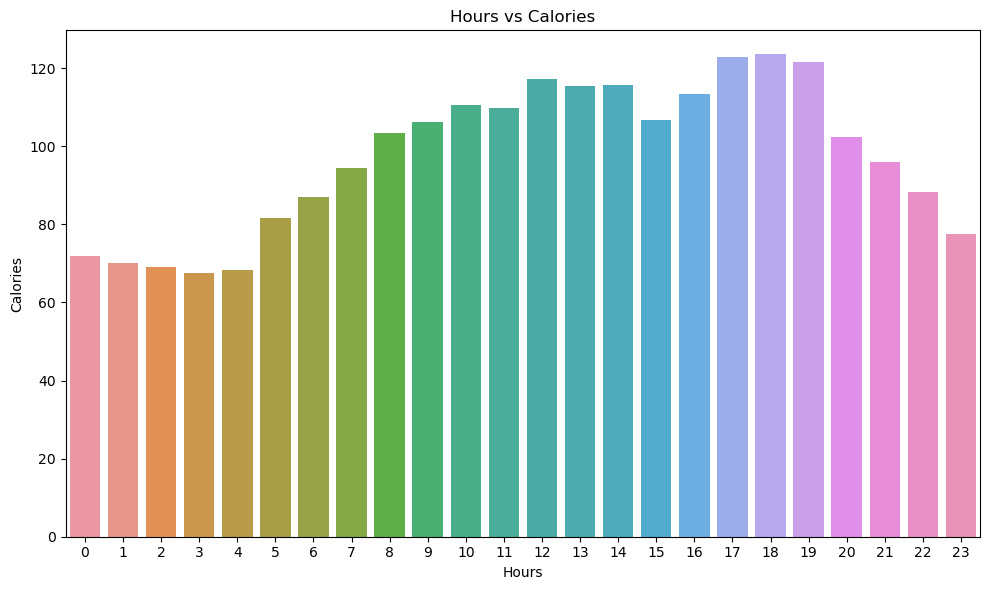

In [27]:
hourly_calories['ActivityHour'] = pd.to_datetime(hourly_calories['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')
hourly_calories["Hour"] = hourly_calories["ActivityHour"].dt.hour
calories_by_hour = hourly_calories.groupby("Hour")["Calories"].mean()


plt.figure(figsize=(10, 6))
sns.barplot(x= calories_by_hour.index, y=calories_by_hour.values)
plt.xlabel('Hours')
plt.ylabel('Calories')
plt.title('Hours vs Calories')


plt.tight_layout()
plt.ticklabel_format(style="plain",axis="y")

plt.show()


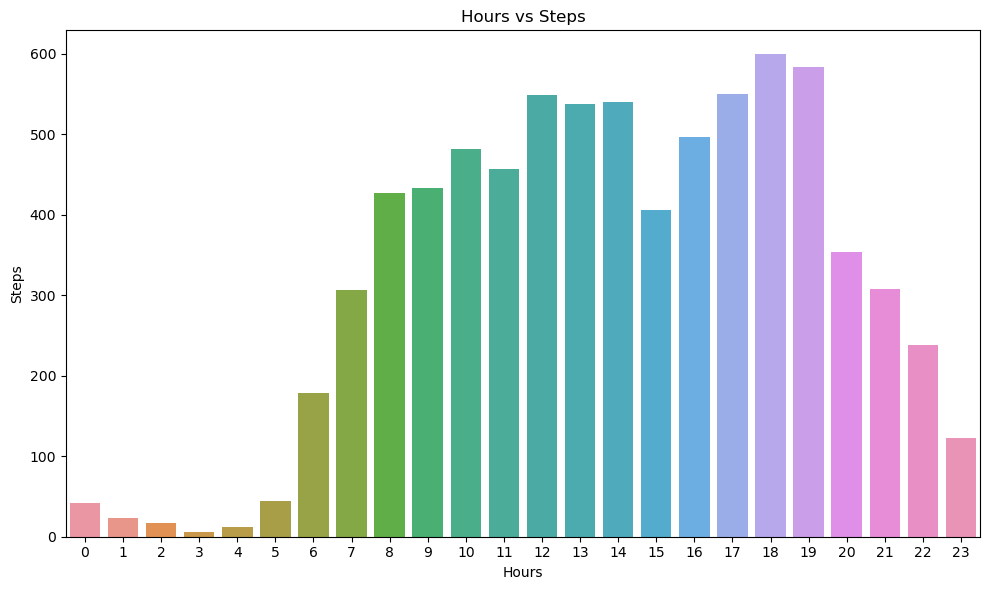

In [28]:
hourly_steps['ActivityHour'] = pd.to_datetime(hourly_steps['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')
hourly_steps["Hour"] = hourly_steps["ActivityHour"].dt.hour
step_calories_by_hour = hourly_steps.groupby("Hour")["StepTotal"].mean()


plt.figure(figsize=(10, 6))
sns.barplot(x= step_calories_by_hour.index, y=step_calories_by_hour.values)
plt.xlabel('Hours')
plt.ylabel('Steps')
plt.title('Hours vs Steps')


plt.tight_layout()
plt.ticklabel_format(style="plain",axis="y")

plt.show()

##  Scatter Diagrams

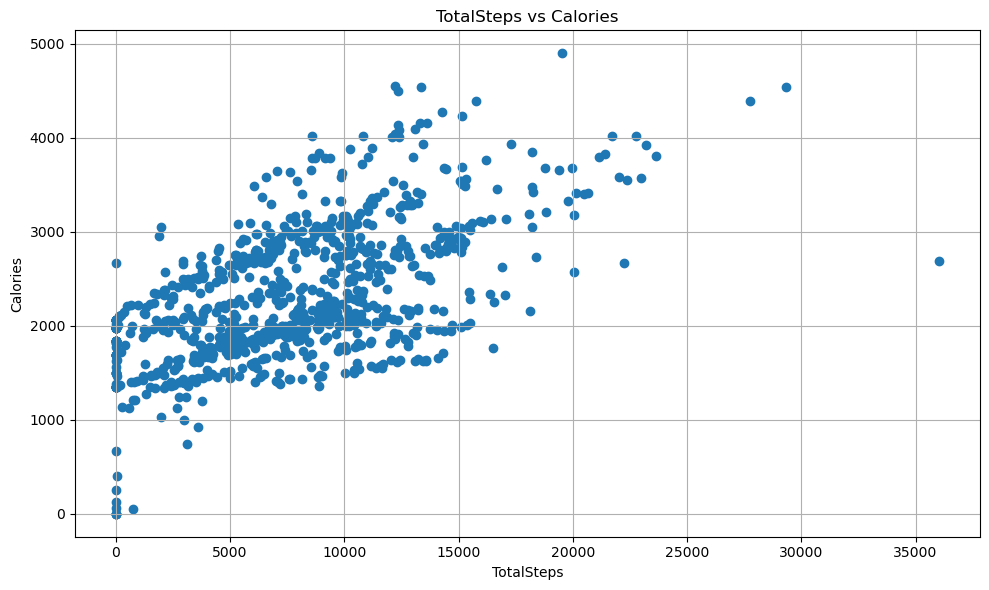

In [29]:
plt.figure(figsize=(10, 6))
 
plt.scatter(daily_activity['TotalSteps'], daily_activity['Calories'])

plt.title('TotalSteps vs Calories')
plt.xlabel('TotalSteps')
plt.ylabel('Calories')
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
daily_activity[ ['TotalSteps', 'Calories'] ].corr()

,TotalSteps,Calories
TotalSteps,1.000000,0.594025
Calories,0.594025,1.000000


as one can see we can't directly say there is a strong correlation between total steps vs calories so instead search correlation for every uniqe person's total steps vs clories

## Correlation

In [31]:
daily_activity.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'DayOfWeek'],
      dtype='object')

In [32]:
correlation_matrix = daily_activity.iloc[:,2:-1].corr()
correlation_matrix

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
TotalSteps,1.000000,0.985606,0.985048,0.182875,0.741944,0.505892,0.692210,0.056736,0.668898,0.496878,0.570604,-0.327798,0.594025
TotalDistance,0.985606,1.000000,0.999491,0.189658,0.795564,0.470603,0.661926,0.063005,0.682845,0.462191,0.518053,-0.289286,0.646658
TrackerDistance,0.985048,0.999491,1.000000,0.163070,0.795326,0.470082,0.661259,0.054746,0.682377,0.462431,0.516425,-0.290587,0.647028
LoggedActivitiesDistance,0.182875,0.189658,0.163070,1.000000,0.151550,0.076051,0.140386,0.165602,0.232367,0.054657,0.104794,-0.039088,0.208720
VeryActiveDistance,0.741944,0.795564,0.795326,0.151550,1.000000,0.195623,0.159096,0.022491,0.826943,0.214436,0.062473,-0.066054,0.490433
ModeratelyActiveDistance,0.505892,0.470603,0.470082,0.076051,0.195623,1.000000,0.238916,0.007108,0.228332,0.945007,0.165114,-0.230480,0.223303
LightActiveDistance,0.692210,0.661926,0.661259,0.140386,0.159096,0.238916,1.000000,0.092841,0.157207,0.220589,0.886602,-0.408452,0.469098
SedentaryActiveDistance,0.056736,0.063005,0.054746,0.165602,0.022491,0.007108,0.092841,1.000000,-0.001535,-0.022347,0.124957,0.034686,0.030034
VeryActiveMinutes,0.668898,0.682845,0.682377,0.232367,0.826943,0.228332,0.157207,-0.001535,1.000000,0.317084,0.054602,-0.167871,0.615520
FairlyActiveMinutes,0.496878,0.462191,0.462431,0.054657,0.214436,0.945007,0.220589,-0.022347,0.317084,1.000000,0.151799,-0.247029,0.305676


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

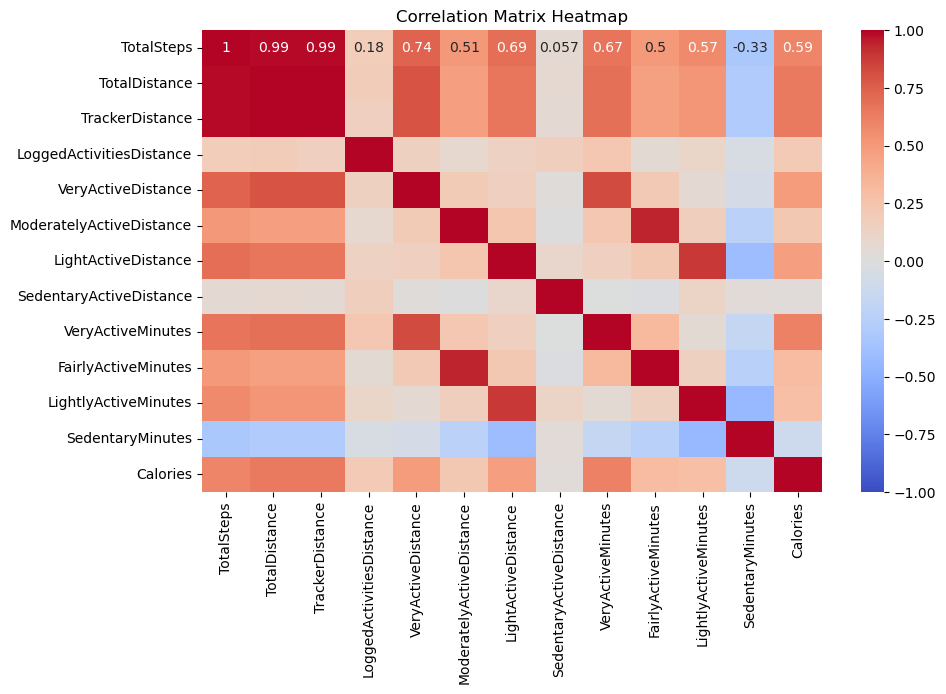

In [33]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')

### Looking for each user

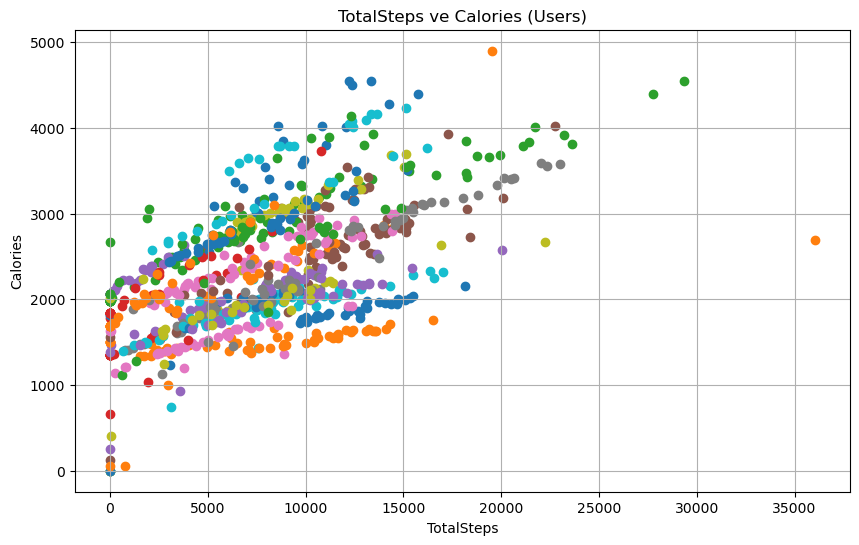

In [34]:
plt.figure(figsize=(10, 6))
for user_id in daily_activity['Id'].unique():
    user_data = daily_activity[daily_activity['Id'] == user_id]
    plt.scatter(user_data['TotalSteps'], user_data['Calories'], label=f'ID {user_id}')

plt.title('TotalSteps ve Calories (Users)')
plt.xlabel('TotalSteps')
plt.ylabel('Calories')
plt.grid(True)
plt.show()

In [35]:
unique_ids = daily_activity['Id'].unique()

correlations = []
for user_id in unique_ids:
    user_data = daily_activity[daily_activity['Id'] == user_id]
    correlation = user_data['TotalSteps'].corr(user_data['Calories'])
    correlations.append((user_id, correlation))

correlations.sort(key=lambda x: x[1], reverse=True)
 
for user_id, correlation in correlations:
    print(f"ID {user_id}: Corr Coef = {correlation}")

ID 8053475328: Corr Coef = 0.9638580109987214
ID 6117666160: Corr Coef = 0.9309348921810928
ID 1624580081: Corr Coef = 0.9296681464947458
ID 1644430081: Corr Coef = 0.9185904914073683
ID 1844505072: Corr Coef = 0.9153856612772788
ID 5577150313: Corr Coef = 0.9124222408666433
ID 2320127002: Corr Coef = 0.9105871244189373
ID 2026352035: Corr Coef = 0.9043380803942941
ID 4020332650: Corr Coef = 0.8958439735999122
ID 4702921684: Corr Coef = 0.8933143993456092
ID 1503960366: Corr Coef = 0.8919684915321179
ID 6962181067: Corr Coef = 0.8882725406161255
ID 7007744171: Corr Coef = 0.8875945808287484
ID 5553957443: Corr Coef = 0.8806386718919169
ID 7086361926: Corr Coef = 0.8800945139679136
ID 4388161847: Corr Coef = 0.8799526050825597
ID 4319703577: Corr Coef = 0.8594032301087787
ID 6775888955: Corr Coef = 0.859114614255286
ID 4445114986: Corr Coef = 0.8570087240330705
ID 3977333714: Corr Coef = 0.8370252921403378
ID 8378563200: Corr Coef = 0.8288048199903646
ID 8792009665: Corr Coef = 0.825497

now we can see strong correlation, so we can conclude that total steps vs calories are related if we look uniquely

#### Create pie chart showing Percentage of Activity in Minutes


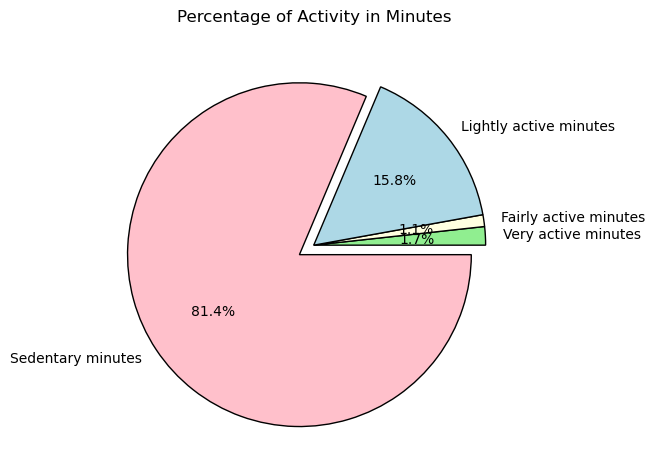

In [36]:
very_active_mins = daily_activity["VeryActiveMinutes"].sum()
fairly_active_mins = daily_activity["FairlyActiveMinutes"].sum()
lightly_active_mins = daily_activity["LightlyActiveMinutes"].sum()
sedentary_mins = daily_activity["SedentaryMinutes"].sum()
slices = [very_active_mins, fairly_active_mins, lightly_active_mins, sedentary_mins]
labels = ["Very active minutes", "Fairly active minutes", "Lightly active minutes", "Sedentary minutes"]
colours = ["lightgreen", "lightyellow", "lightblue", "pink"]
explode = [0, 0, 0, 0.1]
plt.style.use("default")
plt.pie(slices, labels = labels, 
        colors = colours, wedgeprops = {"edgecolor": "black"}, 
        explode = explode, autopct = "%1.1f%%")
plt.title("Percentage of Activity in Minutes")
plt.tight_layout()
plt.show()

# https://github.com/NLL369/FitBit-Fitness-Tracker-Data-Project/blob/main/Google%20Data%20Analytics%20Capstone%20-%20Bellabeat%20Project.ipynb

Look at the scatter plots of Sedentary and Very Active Minutes per user to see a difference

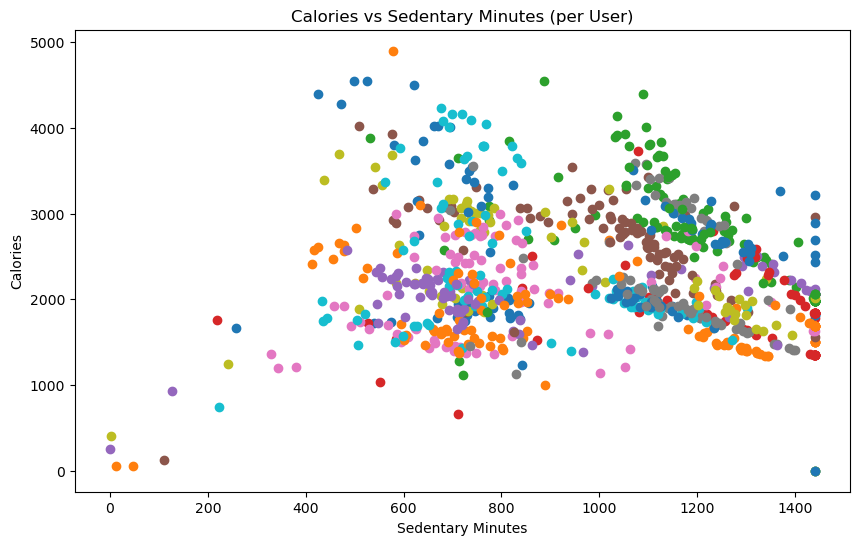

In [37]:
plt.figure(figsize=(10, 6))
for user_id in daily_activity['Id'].unique():
    user_data = daily_activity[daily_activity['Id'] == user_id]
    plt.scatter(user_data['SedentaryMinutes'], user_data['Calories'], label=f'ID {user_id}')
plt.title('Calories vs Sedentary Minutes (per User)')
plt.xlabel('Sedentary Minutes')
plt.ylabel('Calories')
plt.show()

# do each for different activiy minutes or distances

In [38]:
unique_ids = daily_activity['Id'].unique()

correlations = []
for user_id in unique_ids:
    user_data = daily_activity[daily_activity['Id'] == user_id]
    correlation = user_data['SedentaryMinutes'].corr(user_data['Calories'])
    correlations.append((user_id, correlation))

correlations.sort(key=lambda x: x[1], reverse=True)
 
for user_id, correlation in correlations:
    print(f"ID {user_id}: Corr Coef = {correlation}")

ID 3977333714: Corr Coef = 0.7988755096124521
ID 2347167796: Corr Coef = 0.7621611053560048
ID 4057192912: Corr Coef = 0.5319850617361997
ID 5553957443: Corr Coef = 0.5111048623592132
ID 7007744171: Corr Coef = 0.41840706545360806
ID 8378563200: Corr Coef = 0.3355350786921952
ID 3372868164: Corr Coef = 0.27193116236334264
ID 6962181067: Corr Coef = 0.24619680410740707
ID 4319703577: Corr Coef = 0.20412713091387316
ID 4445114986: Corr Coef = 0.10069037756589042
ID 2873212765: Corr Coef = -0.03587662005041923
ID 1927972279: Corr Coef = -0.052623956277938075
ID 6775888955: Corr Coef = -0.08358356286942065
ID 4388161847: Corr Coef = -0.1103717595715062
ID 8792009665: Corr Coef = -0.13908212348004217
ID 1644430081: Corr Coef = -0.15590211750957098
ID 2022484408: Corr Coef = -0.2312254579077068
ID 4702921684: Corr Coef = -0.2660559507481611
ID 8053475328: Corr Coef = -0.2669467777842217
ID 1844505072: Corr Coef = -0.27047586132123014
ID 7086361926: Corr Coef = -0.27252549248223606
ID 4558609

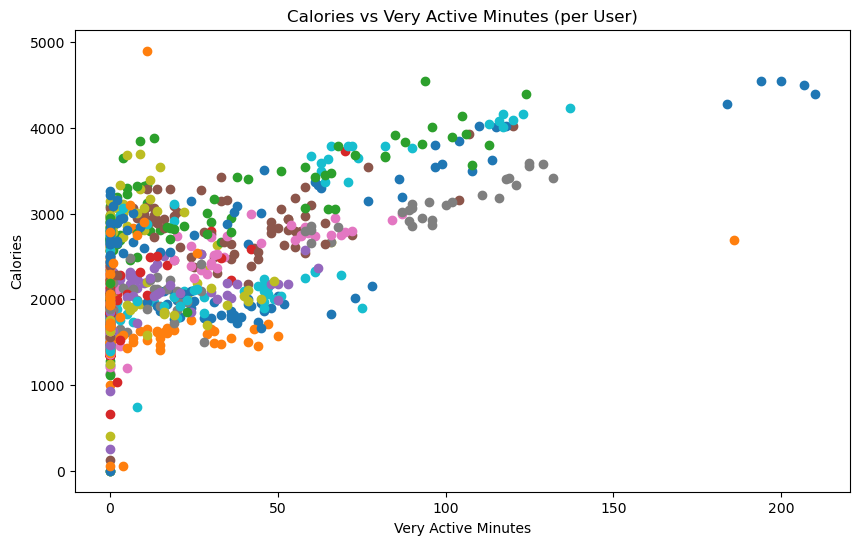

In [39]:
plt.figure(figsize=(10, 6))
for user_id in daily_activity['Id'].unique():
    user_data = daily_activity[daily_activity['Id'] == user_id]
    plt.scatter(user_data['VeryActiveMinutes'], user_data['Calories'], label=f'ID {user_id}')
plt.title('Calories vs Very Active Minutes (per User)')
plt.xlabel('Very Active Minutes')
plt.ylabel('Calories')
plt.show()

In [40]:
unique_ids = daily_activity['Id'].unique()

correlations = []
for user_id in unique_ids:
    user_data = daily_activity[daily_activity['Id'] == user_id]
    correlation = user_data['VeryActiveMinutes'].corr(user_data['Calories'])
    correlations.append((user_id, correlation))

correlations.sort(key=lambda x: x[1], reverse=True)
 
for user_id, correlation in correlations:
    print(f"ID {user_id}: Corr Coef = {correlation}")

ID 8378563200: Corr Coef = 0.93512287876711
ID 8053475328: Corr Coef = 0.9298279453120917
ID 1624580081: Corr Coef = 0.9145444191555059
ID 8877689391: Corr Coef = 0.893386202005083
ID 5577150313: Corr Coef = 0.8916484860238088
ID 6775888955: Corr Coef = 0.8408612829652585
ID 7086361926: Corr Coef = 0.8023179667278154
ID 5553957443: Corr Coef = 0.7668644933727464
ID 4388161847: Corr Coef = 0.7371516565845345
ID 2022484408: Corr Coef = 0.7161354145018642
ID 6962181067: Corr Coef = 0.6761863591865594
ID 7007744171: Corr Coef = 0.651485703935823
ID 1503960366: Corr Coef = 0.5743710954678504
ID 8792009665: Corr Coef = 0.5720862022167289
ID 4558609924: Corr Coef = 0.5382759453610629
ID 8253242879: Corr Coef = 0.5285298180794721
ID 2347167796: Corr Coef = 0.5281183135722972
ID 1644430081: Corr Coef = 0.4972352829562709
ID 4020332650: Corr Coef = 0.4819221193188462
ID 3372868164: Corr Coef = 0.4515261740767623
ID 4319703577: Corr Coef = 0.4353941174891814
ID 4702921684: Corr Coef = 0.411562984

need to look per user to find high correlation for further analysis

#### Minutes and Distances Plots

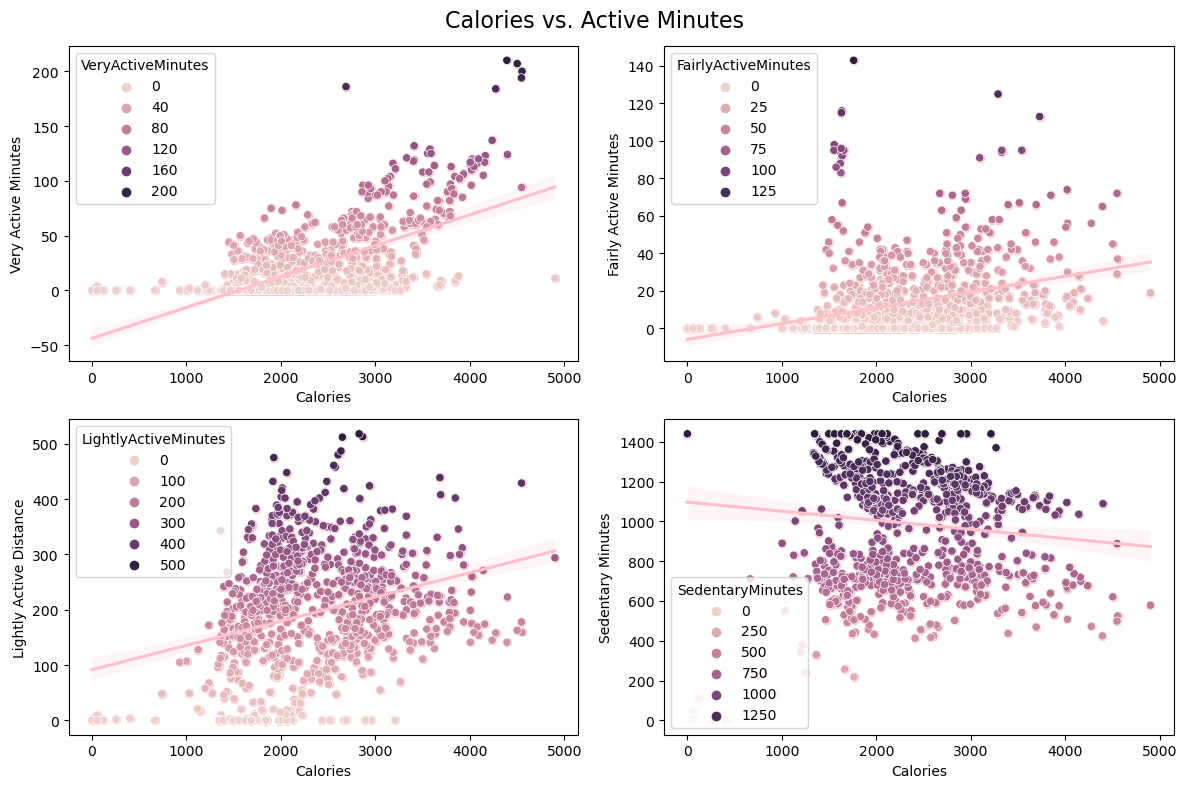

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

 
fig, axes = plt.subplots(2, 2, figsize=(12, 8) )
 
sns.regplot(data=daily_activity,
            x='Calories',
            y='VeryActiveMinutes',
            ax=axes[0,0], color="pink")
sns.scatterplot(data=daily_activity,
                x='Calories',
                y='VeryActiveMinutes',
                hue='VeryActiveMinutes', ax=axes[0, 0])
axes[0, 0].set_xlabel("Calories")
axes[0, 0].set_ylabel("Very Active Minutes")

sns.regplot(data=daily_activity,
            x='Calories',
            y='FairlyActiveMinutes',
            ax=axes[0,1], color="pink")
sns.scatterplot(data=daily_activity,
                x='Calories',
                y='FairlyActiveMinutes',
                hue='FairlyActiveMinutes', ax=axes[0, 1])
axes[0, 1].set_xlabel("Calories")
axes[0, 1].set_ylabel("Fairly Active Minutes")

sns.regplot(data=daily_activity,
            x='Calories',
            y='LightlyActiveMinutes',
            ax=axes[1,0], color="pink")
sns.scatterplot(data=daily_activity,
                x='Calories',
                y='LightlyActiveMinutes',
                hue='LightlyActiveMinutes', ax=axes[1, 0])
axes[1, 0].set_xlabel("Calories")
axes[1, 0].set_ylabel("Lightly Active Distance")

sns.regplot(data=daily_activity,
            x='Calories',
            y='SedentaryMinutes',
            ax=axes[1,1], color="pink")
sns.scatterplot(data=daily_activity,
                x='Calories',
                y='SedentaryMinutes',
                hue='SedentaryMinutes', ax=axes[1, 1])
axes[1, 1].set_xlabel("Calories")
axes[1, 1].set_ylabel("Sedentary Minutes")
 
fig.suptitle('Calories vs. Active Minutes', fontsize=16)

 
plt.tight_layout()  
plt.show()

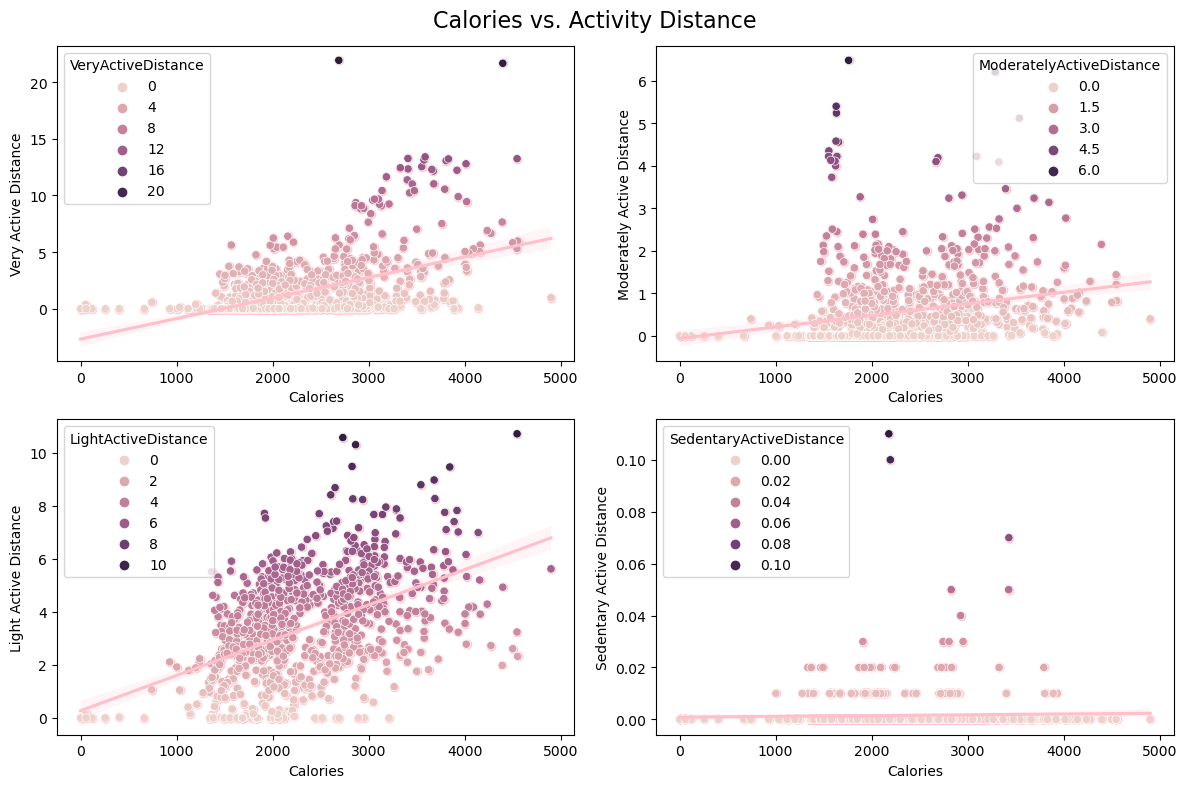

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

 
fig, axes = plt.subplots(2, 2, figsize=(12, 8) )
 
sns.regplot(data=daily_activity,
            x='Calories',
            y='VeryActiveDistance',
            ax=axes[0,0], color="pink")
sns.scatterplot(data=daily_activity,
                x='Calories',
                y='VeryActiveDistance',
                hue='VeryActiveDistance', ax=axes[0, 0])
axes[0, 0].set_xlabel("Calories")
axes[0, 0].set_ylabel("Very Active Distance")

sns.regplot(data=daily_activity,
            x='Calories',
            y='ModeratelyActiveDistance',
            ax=axes[0,1], color="pink")
sns.scatterplot(data=daily_activity,
                x='Calories',
                y='ModeratelyActiveDistance',
                hue='ModeratelyActiveDistance', ax=axes[0, 1])
axes[0, 1].set_xlabel("Calories")
axes[0, 1].set_ylabel("Moderately Active Distance")

sns.regplot(data=daily_activity,
            x='Calories',
            y='LightActiveDistance',
            ax=axes[1,0], color="pink")
sns.scatterplot(data=daily_activity,
                x='Calories',
                y='LightActiveDistance',
                hue='LightActiveDistance', ax=axes[1, 0])
axes[1, 0].set_xlabel("Calories")
axes[1, 0].set_ylabel("Light Active Distance")

sns.regplot(data=daily_activity,
            x='Calories',
            y='SedentaryActiveDistance',
            ax=axes[1,1], color="pink")
sns.scatterplot(data=daily_activity,
                x='Calories',
                y='SedentaryActiveDistance',
                hue='SedentaryActiveDistance', ax=axes[1, 1])
axes[1, 1].set_xlabel("Calories")
axes[1, 1].set_ylabel("Sedentary Active Distance")
 
fig.suptitle('Calories vs. Activity Distance', fontsize=16)

 
plt.tight_layout()  
plt.show()

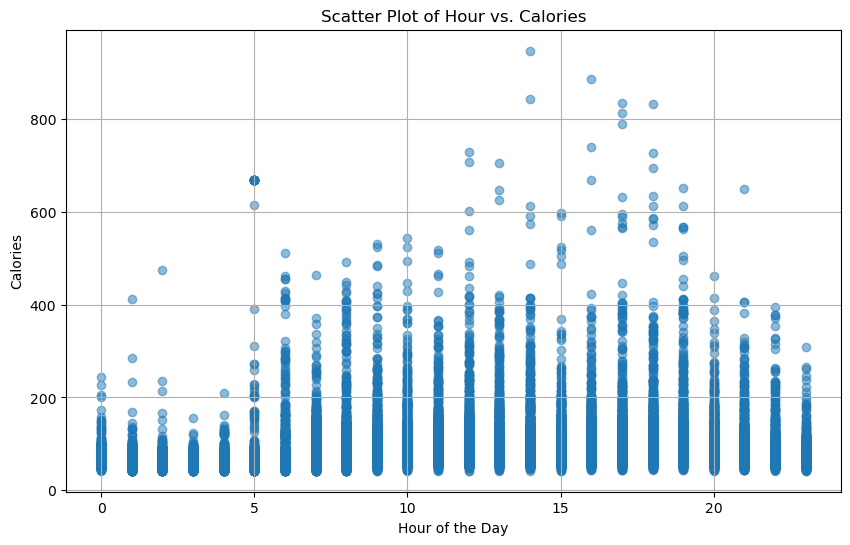

          Calories      Hour
Calories  1.000000  0.180869
Hour      0.180869  1.000000


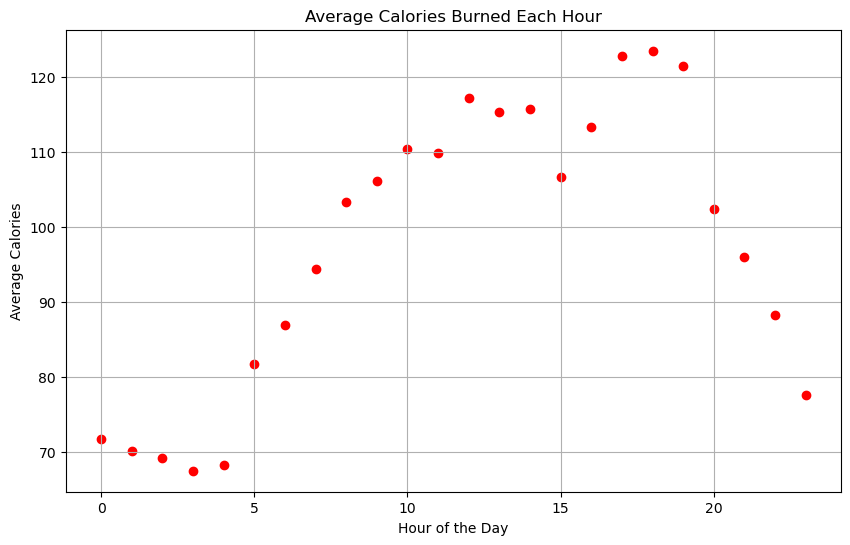

          Calories      Hour
Calories  1.000000  0.576947
Hour      0.576947  1.000000


In [43]:
hourly_calories['ActivityHour'] = pd.to_datetime(hourly_calories['ActivityHour'])
hourly_calories['Hour'] = hourly_calories['ActivityHour'].dt.hour

plt.figure(figsize=(10, 6))
plt.scatter(hourly_calories['Hour'], hourly_calories['Calories'], alpha=0.5)
plt.title('Scatter Plot of Hour vs. Calories')
plt.xlabel('Hour of the Day')
plt.ylabel('Calories')
plt.grid(True)
plt.show()
print(hourly_calories[ ['Calories', 'Hour'] ].corr())

hourly_avg_calories = hourly_calories.groupby('Hour')['Calories'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.scatter(hourly_avg_calories['Hour'], hourly_avg_calories['Calories'], color='r')
plt.title('Average Calories Burned Each Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Calories')
plt.grid(True)
plt.show()
print(hourly_avg_calories[ ['Calories', 'Hour'] ].corr())




#### We can't see a strong correlation so lets find a relevant interval which is approximatly between 4 to 13 to search for a better correlation

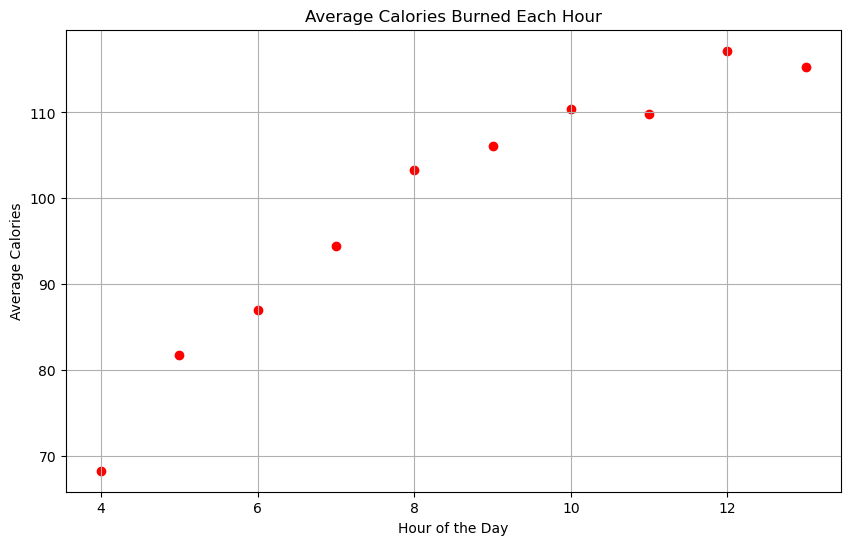

          Calories      Hour
Calories  1.000000  0.955761
Hour      0.955761  1.000000


In [44]:
filtered_data= hourly_avg_calories[(hourly_avg_calories["Hour"] >= 4) & (hourly_avg_calories["Hour"] <= 13)]
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['Hour'], filtered_data['Calories'], color='r')
plt.title('Average Calories Burned Each Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Calories')
plt.grid(True)
plt.show()
print(filtered_data[ ['Calories', 'Hour'] ].corr())


We might reunite our conclusions and conclude that if we are being active in this specific interval we will maximise our calorie burning and reach our health outcomes and goals in a shorter time.

### Analysis between hourly_calories and hourly_steps

In [45]:
hourly_data_and_steps = pd.merge(hourly_calories, hourly_steps, left_on=['Id', 'ActivityHour'], right_on=['Id', 'ActivityHour'])
hourly_data_and_steps.head()

,Id,ActivityHour,Calories,Hour_x,StepTotal,Hour_y
0,1503960366,2016-04-12 00:00:00,81,0,373,0
1,1503960366,2016-04-12 01:00:00,61,1,160,1
2,1503960366,2016-04-12 02:00:00,59,2,151,2
3,1503960366,2016-04-12 03:00:00,47,3,0,3
4,1503960366,2016-04-12 04:00:00,48,4,0,4


Text(0.5, 1.0, 'Hourly Steps vs Calories')

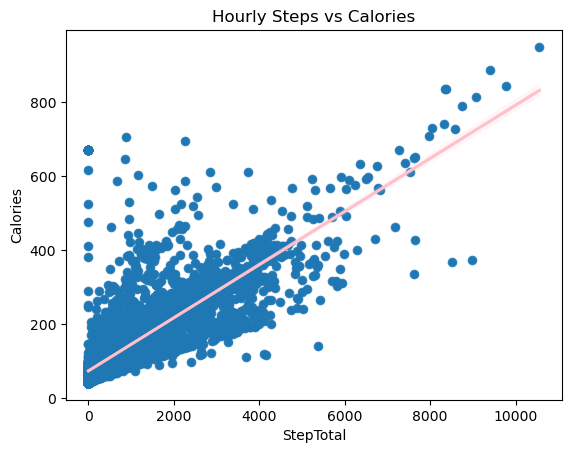

In [46]:
sns.scatterplot(x='StepTotal', y='Calories', data=hourly_data_and_steps)
sns.regplot(x='StepTotal', y='Calories', data=hourly_data_and_steps, line_kws={'color': 'pink'})
plt.title("Hourly Steps vs Calories")

In [47]:
hourly_data_and_steps.head()

,Id,ActivityHour,Calories,Hour_x,StepTotal,Hour_y
0,1503960366,2016-04-12 00:00:00,81,0,373,0
1,1503960366,2016-04-12 01:00:00,61,1,160,1
2,1503960366,2016-04-12 02:00:00,59,2,151,2
3,1503960366,2016-04-12 03:00:00,47,3,0,3
4,1503960366,2016-04-12 04:00:00,48,4,0,4


In [48]:
hourly_data_and_steps[ ['StepTotal', 'Calories'] ].corr()

,StepTotal,Calories
StepTotal,1.000000,0.814968
Calories,0.814968,1.000000


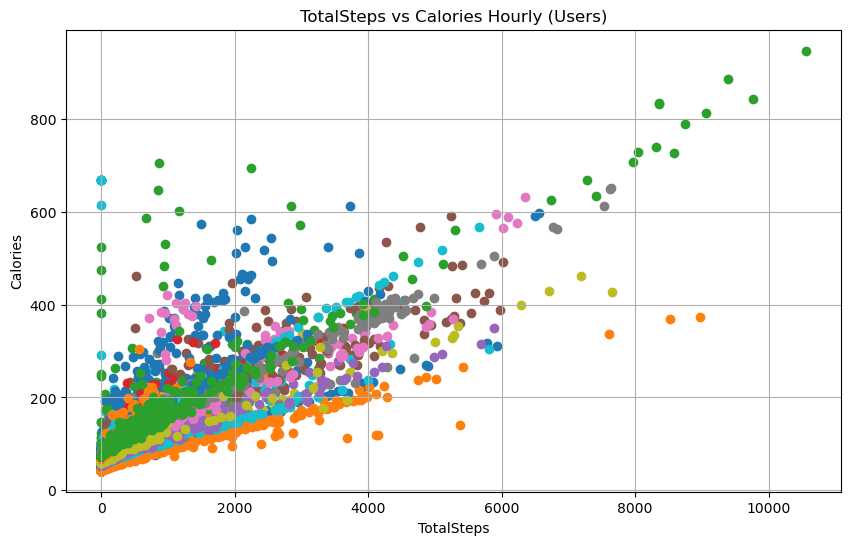

In [49]:
plt.figure(figsize=(10, 6))
for user_id in hourly_data_and_steps['Id'].unique():
    user_data = hourly_data_and_steps[hourly_data_and_steps['Id'] == user_id]
    plt.scatter(user_data['StepTotal'], user_data['Calories'], label=f'ID {user_id}')

plt.title('TotalSteps vs Calories Hourly (Users)')
plt.xlabel('TotalSteps')
plt.ylabel('Calories')
plt.grid(True)
plt.show()

In [50]:
unique_ids = hourly_data_and_steps['Id'].unique()

correlations = []
for user_id in unique_ids:
    user_data = hourly_data_and_steps[hourly_data_and_steps['Id'] == user_id]
    correlation = user_data['StepTotal'].corr(user_data['Calories'])
    correlations.append((user_id, correlation))

correlations.sort(key=lambda x: x[1], reverse=True)
 
for user_id, correlation in correlations:
    print(f"ID {user_id}: Corr Coef = {correlation}")

ID 8053475328: Corr Coef = 0.9955272931549797
ID 3977333714: Corr Coef = 0.993201272499911
ID 4057192912: Corr Coef = 0.9906733446038568
ID 8583815059: Corr Coef = 0.9873800888496151
ID 1503960366: Corr Coef = 0.9868319074348444
ID 8253242879: Corr Coef = 0.9810803648323139
ID 4319703577: Corr Coef = 0.979193512982103
ID 1644430081: Corr Coef = 0.9779703454236871
ID 4702921684: Corr Coef = 0.9756150906407972
ID 2320127002: Corr Coef = 0.9752877233833487
ID 1844505072: Corr Coef = 0.9742739276924312
ID 2026352035: Corr Coef = 0.9722859849899491
ID 6962181067: Corr Coef = 0.967837536780866
ID 6117666160: Corr Coef = 0.9668725131446513
ID 1927972279: Corr Coef = 0.9639625548936029
ID 4445114986: Corr Coef = 0.9623740520019045
ID 4388161847: Corr Coef = 0.961819074517244
ID 7007744171: Corr Coef = 0.9580715100061761
ID 3372868164: Corr Coef = 0.9474669322057551
ID 5553957443: Corr Coef = 0.9465379574643815
ID 2347167796: Corr Coef = 0.9460660180556004
ID 8792009665: Corr Coef = 0.941804069

# Linear Models

In [51]:
hourly_data_and_steps.head()

,Id,ActivityHour,Calories,Hour_x,StepTotal,Hour_y
0,1503960366,2016-04-12 00:00:00,81,0,373,0
1,1503960366,2016-04-12 01:00:00,61,1,160,1
2,1503960366,2016-04-12 02:00:00,59,2,151,2
3,1503960366,2016-04-12 03:00:00,47,3,0,3
4,1503960366,2016-04-12 04:00:00,48,4,0,4


In [52]:
X = hourly_data_and_steps.drop(["Calories"], axis=1)
y = hourly_data_and_steps["Calories"]

In [53]:
from sklearn.linear_model import LinearRegression
def transform_data(X: pd.DataFrame) -> pd.DataFrame:
    """
    This function can be used to transfer your data however you like to fit a model.
    This function will also be applied to the data when we use the model to predict new values.
    """
    X_new = X.copy() # Copy to avoid modification of the original data.
    features_of_interest = ["StepTotal","Hour_x"]
# YOUR CODE HERE
    X_new=(X_new[features_of_interest])
    X_new.fillna(X_new.mode(), inplace= True)

    return X_new # The current implementation just returns the full dataset, feel free to modify it!

def best_prediction_model(X: pd.DataFrame, y: pd.Series):

# YOUR CODE HERE
    model = LinearRegression() 
    model.fit(X,y)
    return model

In [54]:
# No test available; the code shows how your model will be evaluated

import time
from sklearn.model_selection import train_test_split

# The following function is used for evaluation purposes, do not modify it!
def rmsle(actual, predicted):
    """
    Computes the Root Mean Square Logarithmic Error between two vectors.

    Parameters
    ----------
    actual: list
        The actual values.
    predicted: list
        The predicted values.

    Returns
    -------
    float
        The Root Mean Square Logarithmic Error between the two vectors.
    """
    actual = np.array(actual)
    predicted = np.array(predicted)

    # Ensure all values are non-negative and add 1 to avoid log(0).
    log_true = np.log1p(actual)
    log_pred = np.log1p(predicted)

    squared_log_diff = np.square(log_true - log_pred)
    mean_squared_log_diff = np.mean(squared_log_diff)

    return np.sqrt(mean_squared_log_diff)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

t0 = time.perf_counter()
best = best_prediction_model(transform_data(X_train), y_train)
predicted = best.predict(transform_data(X_test))
t1 = time.perf_counter()
print(f"Your model took {t1-t0:.4} seconds to be trained.\n")

result = rmsle(y_test, predicted)
print("RMSLE on public test set:", result)

Your model took 0.009553 seconds to be trained.

RMSLE on public test set: 0.2474071841367262


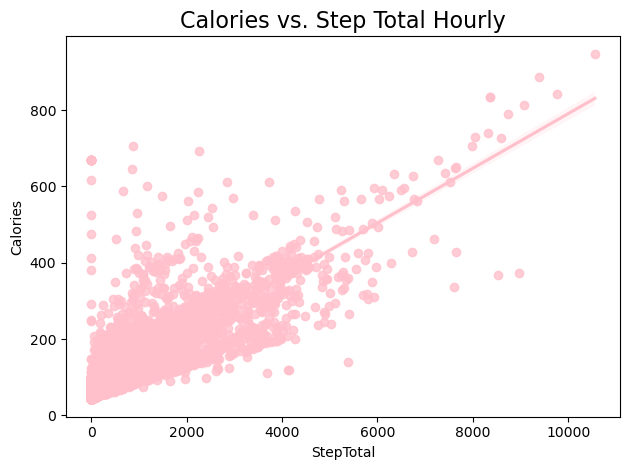

In [55]:
sns.regplot(data=hourly_data_and_steps,
                x='StepTotal',
                y='Calories',
                color='pink')

 
plt.title('Calories vs. Step Total Hourly', fontsize=16)

 
plt.tight_layout()  
plt.show()

In [56]:
user_data2 = hourly_data_and_steps[hourly_data_and_steps['Id'] == 1624580081]
X = user_data2.drop(["Calories"], axis =1)
y = user_data2["Calories"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=90)

t0 = time.perf_counter()
best = best_prediction_model(transform_data(X_train), y_train)
predicted = best.predict(transform_data(X_test))
t1 = time.perf_counter()
print(f"Your model took {t1-t0:.4} seconds to be trained.\n")

result = rmsle(y_test, predicted)
print("RMSLE on public test set:", result)

Your model took 0.003097 seconds to be trained.

RMSLE on public test set: 0.09509287884789523


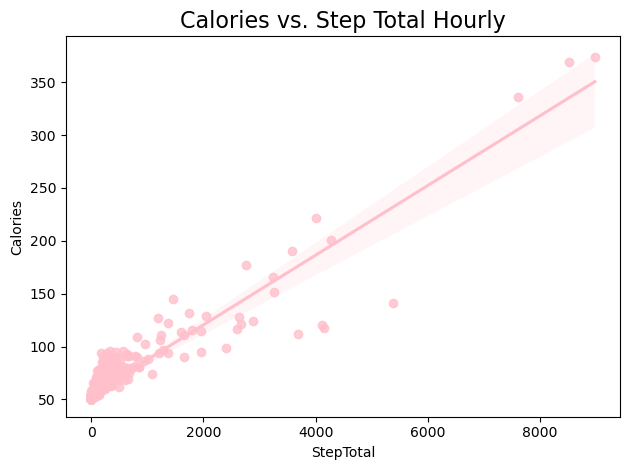

In [57]:
sns.regplot(data=user_data2,
                x='StepTotal',
                y='Calories',
                color='pink')

 
plt.title('Calories vs. Step Total Hourly', fontsize=16)

 
plt.tight_layout()  
plt.show()

With this model, after choosing one user we might have chosen another one since it will not affect the analysis), we proved that we need detailed
analysis for each user. 

### also check for avg. steps but use the first model since it would be closer to reality and to understand eaier

In [58]:
daily_activity['ActivityDate'] = pd.to_datetime(daily_activity['ActivityDate'])
hourly_steps['ActivityHour'] = pd.to_datetime(hourly_steps['ActivityHour'])
hourly_steps['date'] = hourly_steps['ActivityHour'].dt.date

daily_avg_steps = hourly_steps.groupby(['Id', 'date'])['StepTotal'].mean().reset_index()
daily_avg_steps.rename(columns={'StepTotal': 'AvgSteps'}, inplace=True)
daily_avg_steps['date'] = pd.to_datetime(daily_avg_steps['date'])

daily_activity_and_steps = pd.merge(daily_activity, daily_avg_steps, left_on=['Id', 'ActivityDate'], right_on=['Id', 'date'])
daily_activity_and_steps.drop(columns=['date'], inplace=True)

daily_activity_and_steps.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek,AvgSteps
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,548.250000
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday,447.291667
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday,435.833333
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday,403.541667
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday,527.875000


In [59]:
X = daily_activity_and_steps.drop(["Calories"], axis=1)
y = daily_activity_and_steps["Calories"]

In [60]:
from sklearn.linear_model import LinearRegression

def transform_data(X: pd.DataFrame) -> pd.DataFrame:
    """
    This function can be used to transfer your data however you like to fit a model.
    This function will also be applied to the data when we use the model to predict new values.
    """
    X_new = X.copy()

  
    features_of_interest = ['VeryActiveDistance', 'ModeratelyActiveDistance','LightActiveDistance','SedentaryActiveDistance',"VeryActiveMinutes", 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes','AvgSteps']

    X_new = (X_new[features_of_interest]) 
    X_new.fillna(X_new.mode(), inplace= True)
    return X_new

def best_prediction_model(X: pd.DataFrame, y: pd.Series):
    """
    Implement your best prediction model here.
    """

    model = LinearRegression()
    
    model.fit(X, y)
    
    return model

In [61]:
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error as rmsle

# The following function is used for evaluation purposes, do not modify it!
def rmsle(actual, predicted):
    """
    Computes the Root Mean Square Logarithmic Error between two vectors.

    Parameters
    ----------
    actual: list
        The actual values.
    predicted: list
        The predicted values.

    Returns
    -------
    float
        The Root Mean Square Logarithmic Error between the two vectors.
    """
    actual = np.array(actual)
    predicted = np.array(predicted)

    # Ensure all values are non-negative and add 1 to avoid log(0).
    log_true = np.log1p(actual)
    log_pred = np.log1p(predicted)

    squared_log_diff = np.square(log_true - log_pred)
    mean_squared_log_diff = np.mean(squared_log_diff)

    return np.sqrt(mean_squared_log_diff)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

t0 = time.perf_counter()
best = best_prediction_model(transform_data(X_train), y_train)
predicted = best.predict(transform_data(X_test))
t1 = time.perf_counter()
print(f"Your model took {t1-t0:.4} seconds to be trained.\n")

result = round(rmsle(y_test, predicted), 6)
print("RMSE on public test set:", result)

Your model took 0.009101 seconds to be trained.

RMSE on public test set: 0.169171


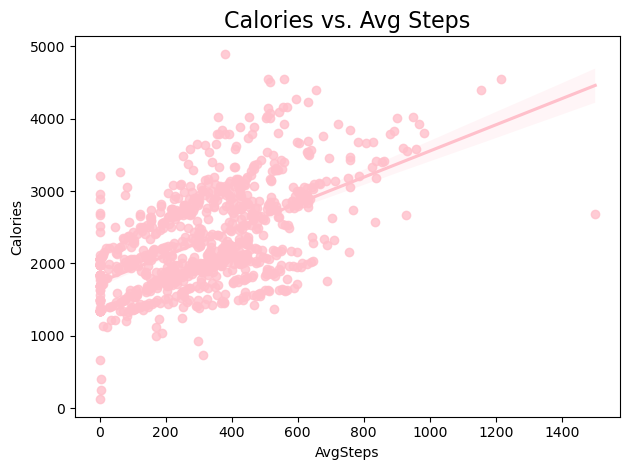

In [62]:
sns.regplot(data=daily_activity_and_steps,
                x='AvgSteps',
                y='Calories',
                color='pink')

 
plt.title('Calories vs. Avg Steps', fontsize=16)

 
plt.tight_layout()  
plt.show()

In [63]:
user_data3 = daily_activity_and_steps[daily_activity_and_steps['Id'] == 1624580081]
X = user_data3.drop(["Calories"], axis =1)
y = user_data3["Calories"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

t0 = time.perf_counter()
best = best_prediction_model(transform_data(X_train), y_train)
predicted = best.predict(transform_data(X_test))
t1 = time.perf_counter()
print(f"Your model took {t1-t0:.4} seconds to be trained.\n")

result = round(rmsle(y_test, predicted), 6)
print("RMSE on public test set:", result)

Your model took 0.004918 seconds to be trained.

RMSE on public test set: 0.01869


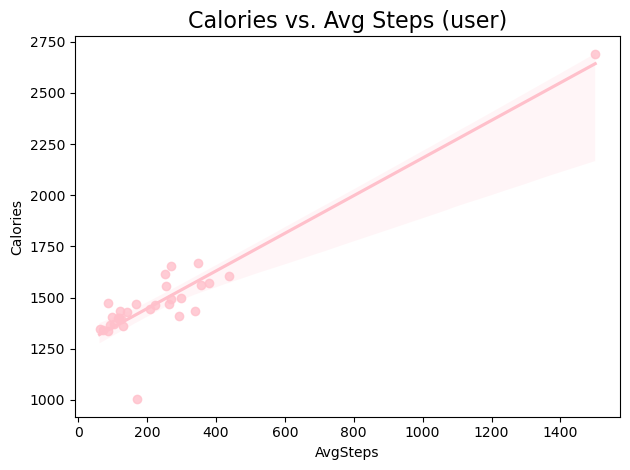

In [64]:
sns.regplot(data=user_data3,
                x='AvgSteps',
                y='Calories',
                color='pink')

 
plt.title('Calories vs. Avg Steps (user)', fontsize=16)

 
plt.tight_layout()  
plt.show()

no need to put into the report since knowing avg steps per daily is harder than knowin total steps per daily, but might be useful for some users that wants to have detailed fitness analysis

## T-Test

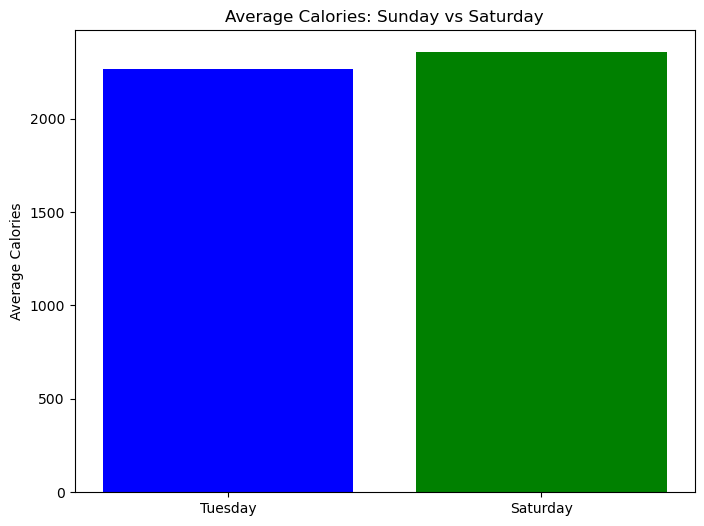

(2263.0,
 2354.967741935484,
 TtestResult(statistic=-0.951065677814409, pvalue=0.3425160196217991, df=243.0))

In [65]:

sunday_data = daily_activity[daily_activity['DayOfWeek'] == 'Sunday']
saturday_data = daily_activity[daily_activity['DayOfWeek'] == 'Saturday']

sunday_avg_calories = sunday_data['Calories'].mean()
saturday_avg_calories = saturday_data['Calories'].mean()



plt.figure(figsize=(8, 6))
plt.bar(['Tuesday', 'Saturday'], [sunday_avg_calories, saturday_avg_calories], color=['blue', 'green'])
plt.title('Average Calories: Sunday vs Saturday')
plt.ylabel('Average Calories')
plt.show()

# Perform t-tests
from scipy.stats import ttest_ind

t_test_calories = ttest_ind(sunday_data['Calories'], saturday_data['Calories'])
(sunday_avg_calories, saturday_avg_calories , t_test_calories, )


In [66]:
#Ho: no difference between mean values
#H1: there is a difference between the mean values
# Saturday = most steps, Sunday = le

Result: 